In [20]:
import torch
import torchvision
from torchvision.datasets import ImageNet
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import numpy as np
import urllib
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [21]:

dataset = ImageNet(root='/Users/adamfulton/Documents/machine learning/MobileNet/data')
print(len(dataset))

100000


In [22]:
dataset = ImageNet(root='/Users/adamfulton/Documents/machine learning/MobileNet/data',transform= transforms.ToTensor())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [23]:

model = models.mobilenet_v3_large(pretrained=True)
model.eval()

MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False

In [24]:
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
    

In [25]:
img_tensor,label = dataset[0]


In [26]:
def split_indices(n, percentage):
    per = int(percentage * n)
    idxs = np.random.permutation(n)
    return idxs[per:], idxs[:per]

In [27]:
test_indices,val_indices = split_indices(len(dataset),percentage=0.9)
print(len(test_indices), len(val_indices))

10000 90000


In [28]:
batch_size=100

test_sampler = SubsetRandomSampler(test_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_loader = DataLoader(dataset,batch_size,sampler=test_sampler)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)


len(test_loader)

100

In [29]:
model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False

In [30]:
trans = transforms.ToPILImage()

for images,labels in test_loader:
    img_tensor = images
    label = labels[45]
    out = model(images)
    break
   

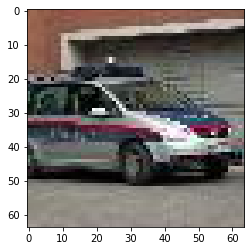

In [31]:
i = img_tensor[12]
img = trans(i)
plt.imshow(img)

In [18]:


probs = torch.nn.functional.softmax(out, dim=0)
top5_prob, top5_catid = torch.topk(probs, 5)
print(top5_catid)


tensor([[961, 996, 959, 938, 963],
        [581, 858, 565, 810, 854],
        [916, 918, 922, 418, 446],
        [869, 308,  83, 794, 893],
        [911,  69, 947, 853, 992],
        [934, 766, 932, 993, 467],
        [365, 213, 945, 971, 568],
        [770,  55, 630, 774,   8],
        [562, 955, 984, 904, 561],
        [838, 767, 692, 623, 549],
        [954, 990, 414, 689, 411],
        [340, 280,   9, 164, 234],
        [982, 601, 819, 903, 875],
        [844, 776, 251, 647, 438],
        [170, 147,  36, 344, 261],
        [908, 980, 867, 238, 484],
        [506, 535, 817, 676, 743],
        [632, 485, 654, 746, 675],
        [703, 372, 374, 246, 447],
        [910, 991, 326, 322, 716],
        [545, 778, 771, 652, 597],
        [185, 191, 282, 193, 285],
        [682, 517, 718, 871, 821],
        [ 30, 269, 390, 389, 235],
        [522, 958, 777, 940, 715],
        [209, 969, 964, 997, 191],
        [795, 384,  71, 806, 558],
        [634, 428, 224, 421, 661],
        [710,  94,  

In [16]:

for i in range(len(top5_prob)):
    print("################################",i)
    
    for j in range(0,5): 
        print(categories[top5_catid[i][j]], top5_prob[i][j].item())

################################ 0
goldfish 0.9359708428382874
sea anemone 0.876455545425415
conch 0.8550147414207458
anemone fish 0.7927762866020203
jellyfish 0.7189319133758545
################################ 1
leatherback turtle 0.5368612408638
breakwater 0.42617300152778625
envelope 0.23979303240776062
doormat 0.21913939714431763
shovel 0.12919466197490692
################################ 2
chimpanzee 0.48368021845817566
lacewing 0.29487863183021545
window screen 0.2682523727416992
timber wolf 0.24386881291866302
picket fence 0.24134422838687897
################################ 3
saltshaker 0.3833667039871216
water jug 0.3122287094593048
mortar 0.24389322102069855
vase 0.2369546890258789
rocking chair 0.1640416532754898
################################ 4
wardrobe 0.7609905004501343
plunger 0.5553062558174133
beer bottle 0.40819916129112244
pop bottle 0.35142096877098083
medicine chest 0.2915650010108948
################################ 5
sliding door 0.41948387026786804
little blu